In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [2]:
output_dir = list(os.listdir('../output'))

In [3]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [4]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [5]:
datasets = list(os.listdir('../datasets'))

In [6]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df_all = df_template[:]

for file in output_dataset:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [7]:
df_all['cost'] = df_all.index

### Groupby por dataset

In [8]:
df = df_all[:]

In [9]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [10]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset             package  strategy                     classifier                 
694_diggle_table_a2 modAL    Query by Committee           RF            205.275591   
                                                          C4.5            0.944207   
                    baseline baseline                     C4.5            0.013732   
                    modAL    Query by Committee           NB              2.631967   
                    baseline baseline                     5NN             0.018424   
                                                          RF              0.997697   
                                                          NB              0.008078   
                    modAL    Uncertain Sampling           RF              8.419796   
                    Pyhard   Highest Usefulness Sampling  C4.5            5.856036   
                             Lowest H, Highest U Sampling RF              7.179362   
                    modAL    Expected Model Change        RF             20.735221   
                    Pyhard   Lowest H, Highest U Sampling C4.5            5.643866   
                             Highest LSC Sampling         C4.5            5.560921   
                                                          RF              7.569672   
                             Highest Usefulness Sampling  RF              7.724331   
                             Lowest N2 Sampling           RF              7.463020   
                             Lowest F3 Sampling           RF              8.027733   
                                                          C4.5            6.052248   
                             Lowest Harmfulness Sampling  RF              7.690447   
                    modAL    Random Sampling              RF             14.637014   
                    Pyhard   Lowest Harmfulness Sampling  C4.5            5.673065   
                             Lowest N2 Sampling           C4.5            5.665425   
                    modAL    Expected Model Change        C4.5            0.076439   
                             Uncertain Sampling           5NN             0.563659   
                             Random Sampling              C4.5            0.075508   
                             Uncertain Sampling           C4.5            0.120966   
                             Query by Committee           5NN             4.202148   
                    Pyhard   Lowest H, Highest U Sampling NB              5.600802   
                             Highest Usefulness Sampling  NB              5.566515   
                             Highest LSC Sampling         NB              5.615183   
                    modAL    Expected Model Change        NB              0.446756   
                    Pyhard   Lowest Harmfulness Sampling  NB              5.678420   
                             Lowest N2 Sampling           NB              5.706807   
                    modAL    Uncertain Sampling           NB              0.247102   
                    Pyhard   Lowest Harmfulness Sampling  5NN             5.670510   
                             Highest LSC Sampling         5NN             5.659986   
                             Highest Usefulness Sampling  5NN             5.710000   
                             Lowest F3 Sampling           NB              6.283448   
                    modAL    Random Sampling              NB              0.343692   
                    Pyhard   Lowest N2 Sampling           5NN             5.646621   
                    modAL    Expected Model Change        5NN             0.743386   
                    Pyhard   Lowest H, Highest U Sampling 5NN             5.720325   
                             Lowest F3 Sampling           5NN             5.980516   
                    modAL    Random Sampling              5NN             0.640461   

                                                                      sample_size  \
dataset             package 

In [11]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
package  strategy                     classifier                 
modAL    Query by Committee           RF            205.275591   
                                      C4.5            0.944207   
baseline baseline                     C4.5            0.013732   
modAL    Query by Committee           NB              2.631967   
baseline baseline                     5NN             0.018424   
                                      RF              0.997697   
                                      NB              0.008078   
modAL    Uncertain Sampling           RF              8.419796   
Pyhard   Highest Usefulness Sampling  C4.5            5.856036   
         Lowest H, Highest U Sampling RF              7.179362   
modAL    Expected Model Change        RF             20.735221   
Pyhard   Lowest H, Highest U Sampling C4.5            5.643866   
         Highest LSC Sampling         C4.5            5.560921   
                                      RF              7.569672   
         Highest Usefulness Sampling  RF              7.724331   
         Lowest N2 Sampling           RF              7.463020   
         Lowest F3 Sampling           RF              8.027733   
                                      C4.5            6.052248   
         Lowest Harmfulness Sampling  RF              7.690447   
modAL    Random Sampling              RF             14.637014   
Pyhard   Lowest Harmfulness Sampling  C4.5            5.673065   
         Lowest N2 Sampling           C4.5            5.665425   
modAL    Expected Model Change        C4.5            0.076439   
         Uncertain Sampling           5NN             0.563659   
         Random Sampling              C4.5            0.075508   
         Uncertain Sampling           C4.5            0.120966   
         Query by Committee           5NN             4.202148   
Pyhard   Lowest H, Highest U Sampling NB              5.600802   
         Highest Usefulness Sampling  NB              5.566515   
         Highest LSC Sampling         NB              5.615183   
modAL    Expected Model Change        NB              0.446756   
Pyhard   Lowest Harmfulness Sampling  NB              5.678420   
         Lowest N2 Sampling           NB              5.706807   
modAL    Uncertain Sampling           NB              0.247102   
Pyhard   Lowest Harmfulness Sampling  5NN             5.670510   
         Highest LSC Sampling         5NN             5.659986   
         Highest Usefulness Sampling  5NN             5.710000   
         Lowest F3 Sampling           NB              6.283448   
modAL    Random Sampling              NB              0.343692   
Pyhard   Lowest N2 Sampling           5NN             5.646621   
modAL    Expected Model Change        5NN             0.743386   
Pyhard   Lowest H, Highest U Sampling 5NN             5.720325   
         Lowest F3 Sampling           5NN             5.980516   
modAL    Random Sampling              5NN             0.640461   

                                                  accuracy_history  f1_history  
package  strategy                     classifier                                
modAL    Query by Committee           RF                  0.947005    0.945970  
                                      C4.5                0.938848    0.939191  
baseline baseline                     C4.5                0.912500    0.902619  
modAL    Query by Committee           NB                  0.893182    0.880696  
baseline baseline                     5NN                 0.875000    0.855000  
                                      RF                  0.850000    0.830833  
                                      NB                  0.825000    0.788333  
modAL    Uncertain Sampling           RF                  0.775758    0.766403  
Pyhard   Highest Usefulness Sampling  C4.5                0.735417    0.724100  
         Lowest H, Highest U Sampling RF                  0.729167    0.712384  
modAL    Expected Model Change        RF 

In [12]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset             package  strategy                     classifier                 
694_diggle_table_a2 modAL    Uncertain Sampling           5NN             0.238293   
                    Pyhard   Highest LSC Sampling         5NN             0.079056   
                    modAL    Query by Committee           5NN             1.812875   
                    Pyhard   Highest Usefulness Sampling  5NN             0.122162   
                    modAL    Query by Committee           NB              1.163471   
                    Pyhard   Lowest Harmfulness Sampling  5NN             0.082783   
                             Highest LSC Sampling         C4.5            0.070683   
                             Lowest Harmfulness Sampling  NB              0.073560   
                             Lowest H, Highest U Sampling 5NN             0.141762   
                             Lowest N2 Sampling           5NN             0.133141   
                             Lowest H, Highest U Sampling NB              0.101196   
                             Highest LSC Sampling         NB              0.097881   
                             Highest Usefulness Sampling  NB              0.051667   
                    baseline baseline                     RF              0.416080   
                    Pyhard   Lowest F3 Sampling           C4.5            0.093901   
                                                          5NN             0.050580   
                    modAL    Random Sampling              C4.5            0.019557   
                             Expected Model Change        C4.5            0.022903   
                    Pyhard   Lowest N2 Sampling           C4.5            0.024399   
                    baseline baseline                     5NN             0.010694   
                    Pyhard   Lowest F3 Sampling           NB              0.113141   
                    modAL    Query by Committee           C4.5            0.370530   
                             Expected Model Change        NB              0.194335   
                    Pyhard   Highest Usefulness Sampling  C4.5            0.125563   
                                                          RF              0.533118   
                    baseline baseline                     C4.5            0.011471   
                    Pyhard   Lowest H, Highest U Sampling C4.5            0.087664   
                                                          RF              0.698422   
                             Highest LSC Sampling         RF              0.876361   
                             Lowest F3 Sampling           RF              0.927166   
                    modAL    Expected Model Change        5NN             0.404993   
                    baseline baseline                     NB              0.002955   
                    Pyhard   Lowest Harmfulness Sampling  RF              0.940614   
                             Lowest N2 Sampling           NB              0.128035   
                             Lowest Harmfulness Sampling  C4.5            0.052166   
                    modAL    Uncertain Sampling           RF              3.471579   
                             Query by Committee           RF              0.783689   
                    Pyhard   Lowest N2 Sampling           RF              0.842671   
                    modAL    Random Sampling              RF              2.472151   
                             Expected Model Change        RF              0.411878   
                             Random Sampling              NB              0.145133   
                             Uncertain Sampling           C4.5            0.051880   
                             Random Sampling              5NN             0.277579   
                             Uncertain Sampling           NB              0.104054   

                                                                      accuracy_history  \
dataset             pac

In [13]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)

ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

NameError: name 'total_performance_history' is not defined

## Boxplot

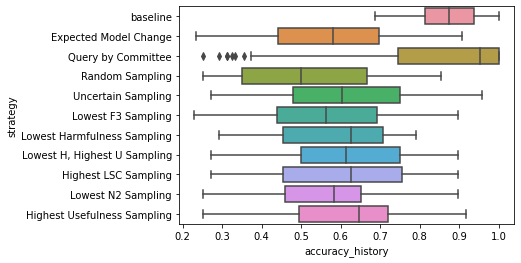

In [14]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

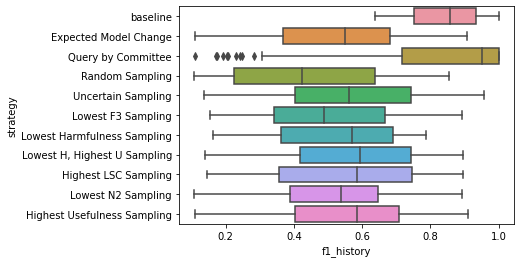

In [15]:
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

NameError: name 'performance_history_total' is not defined

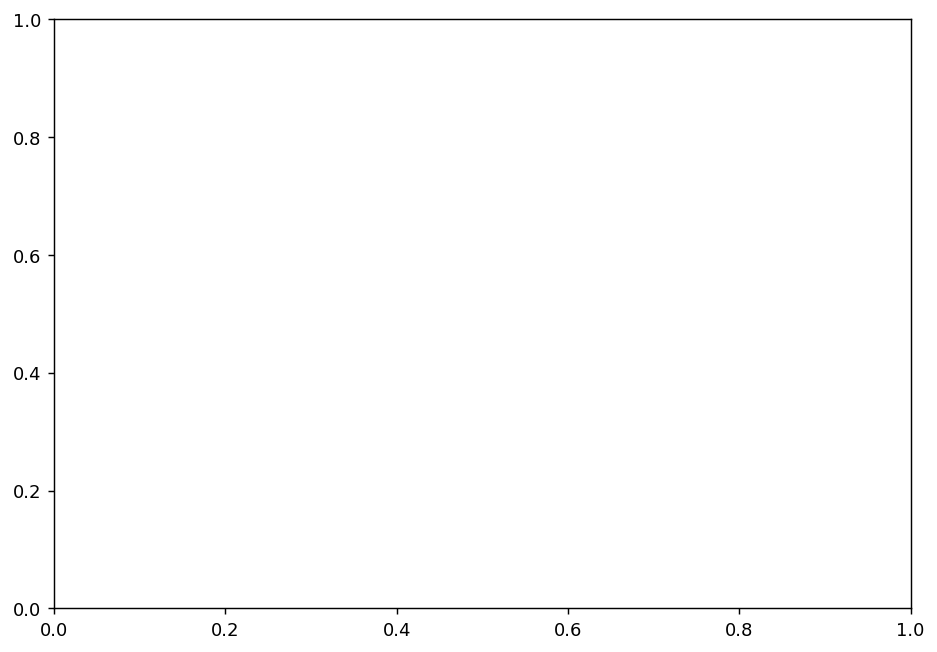

In [16]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

In [ ]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

[None]

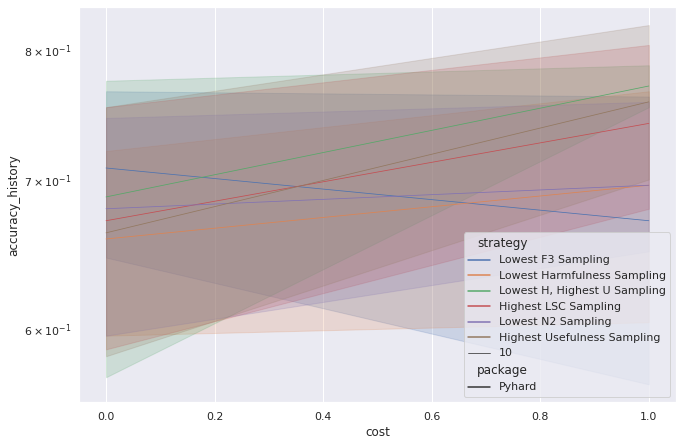

In [17]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [18]:
df_filter = df_all[:]
df_filter = df_filter[(df_filter.package == 'baseline') | (df_filter.package == 'Pyhard') | ((df_filter.package == 'modAL') & (df_filter.cost == 0)) | ((df_filter.package == 'modAL') & (df_filter.cost == 10))]
df_filter[df_filter.cost == 10] = 1

[None]

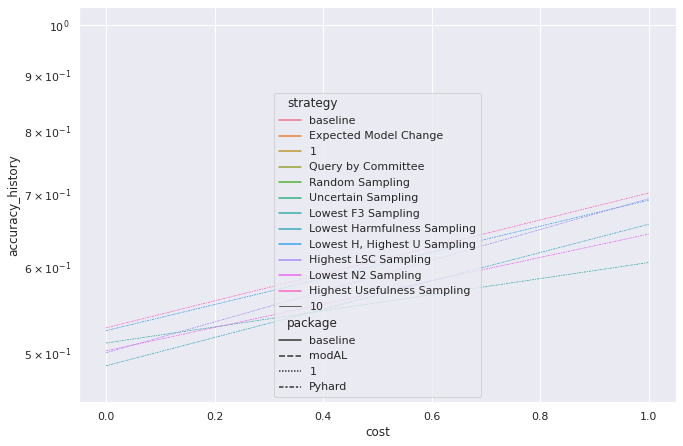

In [19]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package", ci=None,
             data=df_filter[(df_filter.package != "baseline") | (df_filter.classifier == "RF") & (df_filter.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [20]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost
0,baseline,0.013600,5NN,46,baseline,694_diggle_table_a2,0.750000,0.712500,0,0
0,baseline,0.009456,5NN,46,baseline,694_diggle_table_a2,0.937500,0.933333,1,0
0,baseline,0.016885,5NN,46,baseline,694_diggle_table_a2,1.000000,1.000000,2,0
0,baseline,0.015276,5NN,46,baseline,694_diggle_table_a2,0.875000,0.870833,3,0
0,baseline,0.036903,5NN,46,baseline,694_diggle_table_a2,0.812500,0.758333,4,0
...,...,...,...,...,...,...,...,...,...,...
1,Pyhard,8.106872,RF,0.032258,Highest Usefulness Sampling,694_diggle_table_a2,0.833333,0.823951,2,1
0,Pyhard,8.002766,RF,0.032258,Highest Usefulness Sampling,694_diggle_table_a2,0.812500,0.805288,3,0
1,Pyhard,8.002766,RF,0.032258,Highest Usefulness Sampling,694_diggle_table_a2,0.854167,0.846672,3,1
0,Pyhard,7.955325,RF,0.032258,Highest Usefulness Sampling,694_diggle_table_a2,0.562500,0.544519,4,0


In [21]:
test['accuracy_history'].head(20)

NameError: name 'test' is not defined

## Heatmap

In [ ]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

In [ ]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

In [ ]:
heatmap_data = pd.pivot_table(df_filter[(df_filter.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

In [ ]:
df_filter[df_filter.package == '1']